**1) Import Necessary Libraries.**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Importing the DataSet**

In [36]:
data = pd.read_csv('/content/BankChurners.csv')

**2) Display five rows of the data frame.**

In [37]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


**3) Checking the shape of the data**

In [38]:
data.shape

(10127, 21)

**4) Checking the percentage of missing values in each column of the data frame.**

In [39]:
# Calculate the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a DataFrame to display the results
missing_info = pd.DataFrame({'Column': data.columns, 'Missing Percentage': missing_percentage})


# Display the missing percentage information
missing_info


,Column,Missing Percentage
CLIENTNUM,CLIENTNUM,0.0
Attrition_Flag,Attrition_Flag,0.0
Customer_Age,Customer_Age,0.0
Gender,Gender,0.0
Dependent_count,Dependent_count,0.0
Education_Level,Education_Level,0.0
Marital_Status,Marital_Status,0.0
Income_Category,Income_Category,0.0
Card_Category,Card_Category,0.0
Months_on_book,Months_on_book,0.0


**5) Checking if there are any duplicate rows.**

In [40]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Display the duplicate rows (if any)
print("Number of duplicate rows:", duplicate_rows.shape[0])



Number of duplicate rows: 0


 **6) Checking the distribution of the Customer_Age column. Check the basic
statistics like mean, median, and standard deviation of the age column.**

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64
Mean: 46.32596030413745
Median: 46.0
Standard Deviation: 8.016814032549028


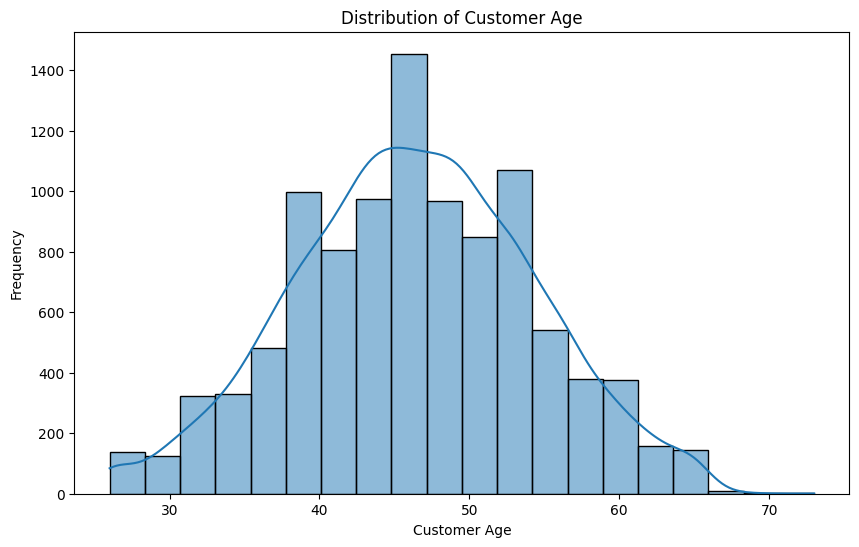

In [41]:
# Display basic statistics of the Customer_Age column
age_stats = data['Customer_Age'].describe()
print(age_stats)
print("Mean:", data['Customer_Age'].mean())
print("Median:", data['Customer_Age'].median())
print("Standard Deviation:", data['Customer_Age'].std())


# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a histogram of the Customer_Age column
sns.histplot(data['Customer_Age'], bins=20, kde=True)

# Add labels and title
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')

# Show the plot
plt.show()

**7) Ploting 2 box plots and 2 pie chart of the parameter of my own choice and my intuition about it.**

Box plot for Credit_Limit

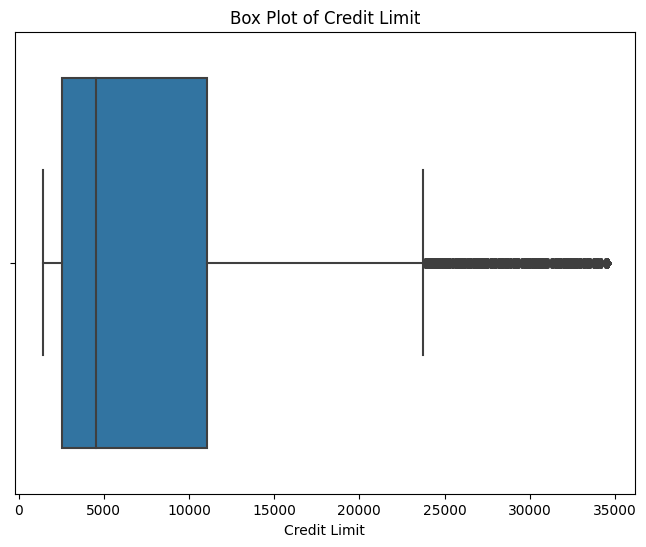

In [42]:
# Create a box plot for Credit_Limit
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Credit_Limit'])
plt.title('Box Plot of Credit Limit')
plt.xlabel('Credit Limit')
plt.show()

Box Plot for Avg_Open_To_Buy

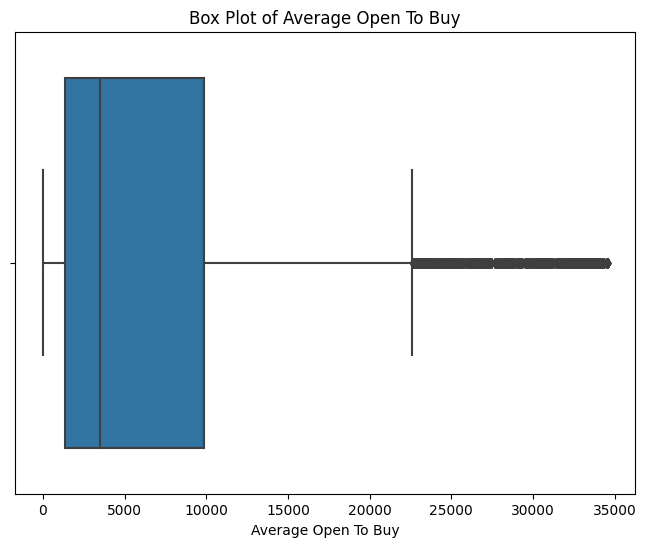

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Avg_Open_To_Buy'])
plt.title('Box Plot of Average Open To Buy')
plt.xlabel('Average Open To Buy')
plt.show()

Pie chart for Attrition_Flag

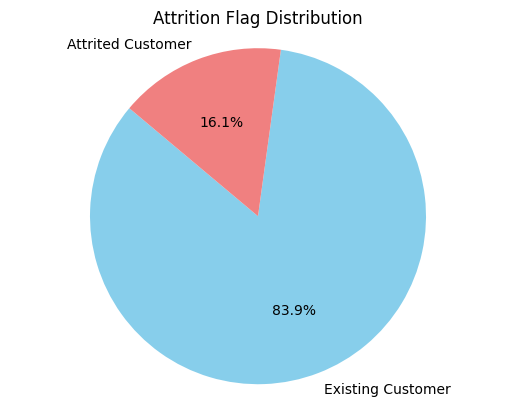

In [44]:
attrition_counts = data['Attrition_Flag'].value_counts()

# Create a pie chart
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Attrition Flag Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Pie chart for Total_Trans_Ct

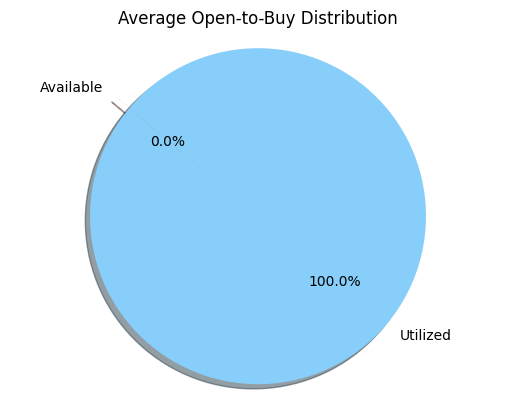

In [45]:
avg_open_to_buy = data['Avg_Open_To_Buy'].mean()

# Create a pie chart
labels = ['Utilized', 'Available']
sizes = [data['Credit_Limit'].sum() - avg_open_to_buy, avg_open_to_buy]
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.1)  # explode 2nd slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Average Open-to-Buy Distribution')
plt.show()

**8) Plot a Box-plot of Total_Revolving_Bal and Card_Category by characterizing with Attrition_Flag. Write your intuitions about it.**

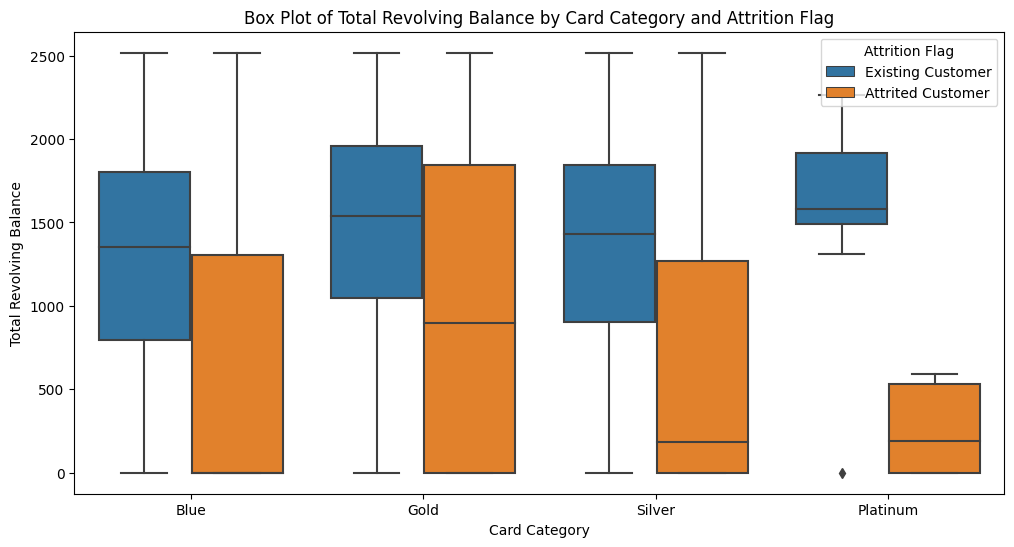

In [46]:
# Set up the figure and axes for the box plot
plt.figure(figsize=(12, 6))

# Create a box plot of Total_Revolving_Bal and Card_Category with Attrition_Flag
sns.boxplot(x='Card_Category', y='Total_Revolving_Bal', hue='Attrition_Flag', data=data)

# Add labels and title
plt.xlabel('Card Category')
plt.ylabel('Total Revolving Balance')
plt.title('Box Plot of Total Revolving Balance by Card Category and Attrition Flag')

# Show the legend
plt.legend(title='Attrition Flag')

# Show the plot
plt.show()


**9) Plot a percentage segment bar graph between education_Level and Attrition_Flag of the customers.**

<ipython-input-47-ee6ed5ec6f5e>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  edu_attrition_percentage = data.groupby(['Education_Level', 'Attrition_Flag']).size().unstack() / data.groupby('Education_Level').size()[:, np.newaxis]


<Figure size 1200x600 with 0 Axes>

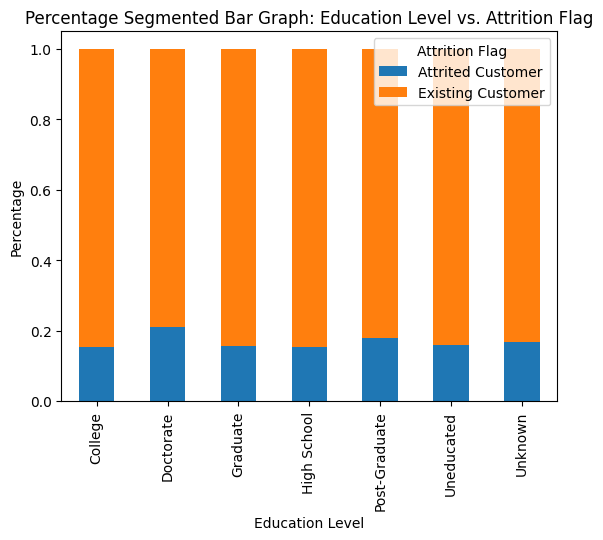

In [47]:
# Calculate the percentage of each education level and attrition flag combination
edu_attrition_percentage = data.groupby(['Education_Level', 'Attrition_Flag']).size().unstack() / data.groupby('Education_Level').size()[:, np.newaxis]

# Set up the figure and axes for the bar plot
plt.figure(figsize=(12, 6))

# Create a bar plot of Education_Level and Attrition_Flag percentages
edu_attrition_percentage.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.title('Percentage Segmented Bar Graph: Education Level vs. Attrition Flag')

# Show the legend
plt.legend(title='Attrition Flag')

# Show the plot
plt.show()

**10) Plot a percentage segment bar graph between Income_Category and Attrition_Flag of the customers.**

<ipython-input-48-2a696452a519>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  income_attrition_percentage = data.groupby(['Income_Category', 'Attrition_Flag']).size().unstack() / data.groupby('Income_Category').size()[:, np.newaxis]


<Figure size 1200x600 with 0 Axes>

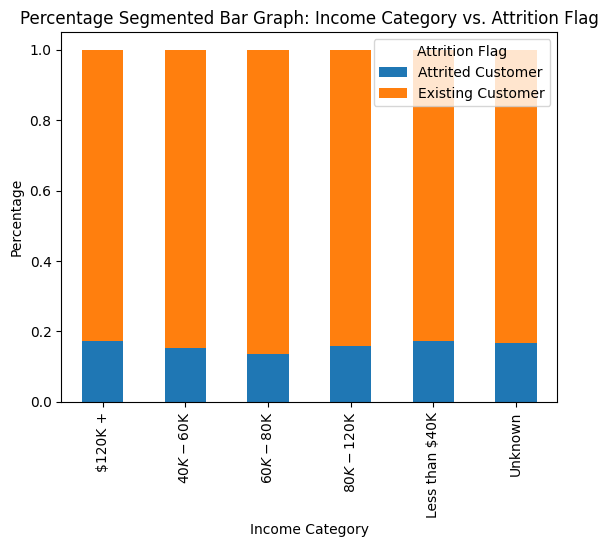

In [48]:
# Calculate the percentage of each income category and attrition flag combination
income_attrition_percentage = data.groupby(['Income_Category', 'Attrition_Flag']).size().unstack() / data.groupby('Income_Category').size()[:, np.newaxis]

# Set up the figure and axes for the bar plot
plt.figure(figsize=(12, 6))

# Create a bar plot of Income_Category and Attrition_Flag percentages
income_attrition_percentage.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Income Category')
plt.ylabel('Percentage')
plt.title('Percentage Segmented Bar Graph: Income Category vs. Attrition Flag')

# Show the legend
plt.legend(title='Attrition Flag')

# Show the plot
plt.show()

**11) Drop CLIENTNUM column.Make a sub data frame which consists of all the numerical columns(i.e.int64,float64) along with the Attrition_Flag column.**

In [49]:
# Drop the CLIENTNUM column
data = data.drop('CLIENTNUM', axis=1)

# Select numerical columns (int64 and float64) along with Attrition_Flag
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
sub_data = data[numerical_columns]


Plot a clear heatmap to view the correlation using seaborn

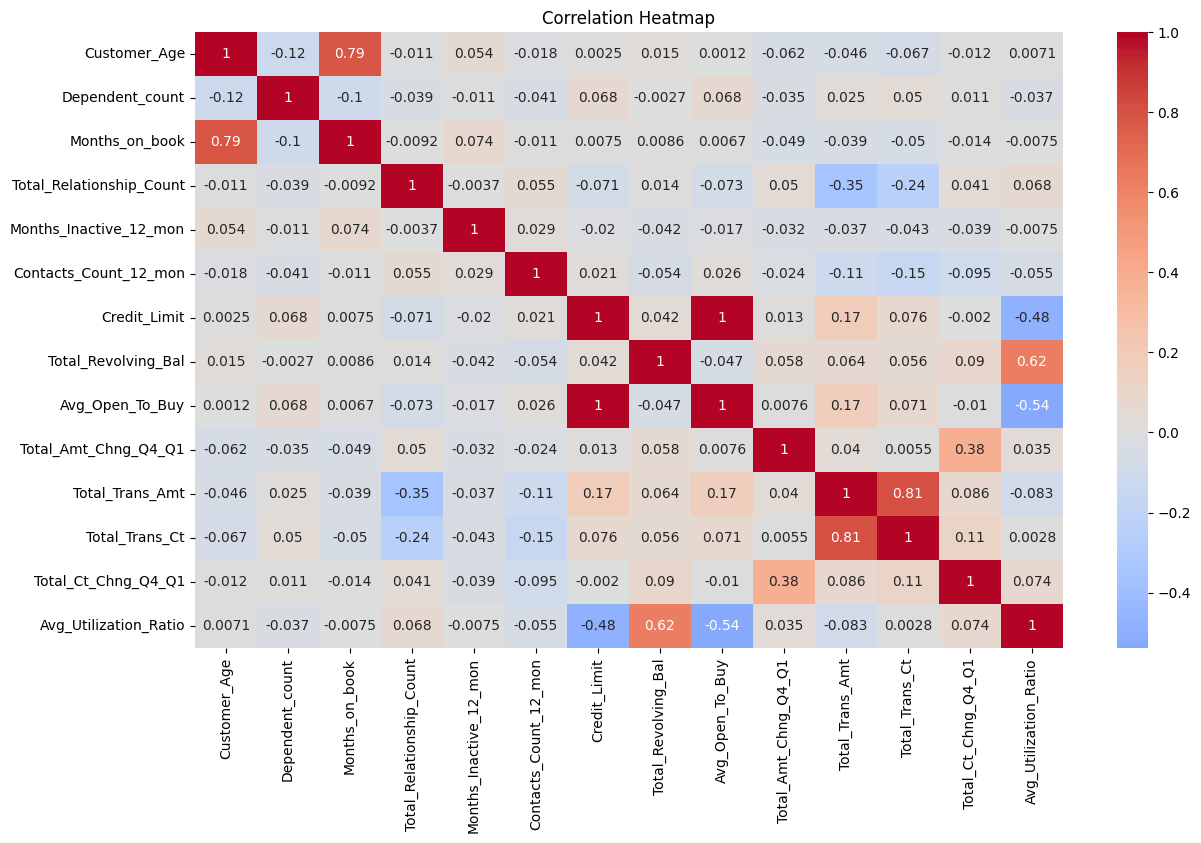

In [50]:
# Calculate the correlation matrix
correlation_matrix = sub_data.corr()

# Set up the figure and axes for the heatmap
plt.figure(figsize=(14, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


**12) Plot a boxplot for the Credit_Limit column and check if it contains any outlier or not.**

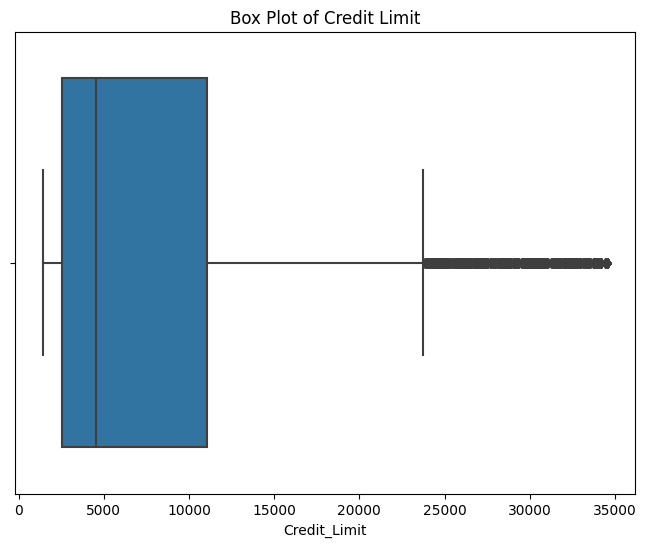

In [51]:
# Set up the figure and axes for the box plot
plt.figure(figsize=(8, 6))

# Create a box plot for the Credit_Limit column
sns.boxplot(x=data['Credit_Limit'])

# Add title
plt.title('Box Plot of Credit Limit')

# Show the plot
plt.show()

**13) Map the Attrition_Flag values to 0 and 1(i.e. Existing Customer=0 and Attrited Customer=1. Standardize the columns**

In [52]:
# Map Attrition_Flag values to 0 and 1
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Select numerical columns for standardization
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Standardize the columns using StandardScaler
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows of the standardized DataFrame
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.437506,-0.165406,M,0.503368,High School,Married,$60K - $80K,Blue,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,-0.437506,0.333570,F,2.043199,Graduate,Single,Less than $40K,Blue,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,-0.437506,0.583058,M,0.503368,Graduate,Married,$80K - $120K,Blue,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.437506,-0.789126,F,1.273283,High School,Unknown,Less than $40K,Blue,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.437506,-0.789126,M,0.503368,Uneducated,Married,$60K - $80K,Blue,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155
